In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import time
from sklearn.utils import shuffle
from tensorflow.examples.tutorials.mnist import input_data

C:\Users\wjssm\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
mnist = input_data.read_data_sets("./MNIST_data", one_hot=True)

Extracting ./MNIST_data\train-images-idx3-ubyte.gz
Extracting ./MNIST_data\train-labels-idx1-ubyte.gz
Extracting ./MNIST_data\t10k-images-idx3-ubyte.gz
Extracting ./MNIST_data\t10k-labels-idx1-ubyte.gz


In [4]:
mnist.train.images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [5]:
mnist.train.images[0].shape

(784,)

In [6]:
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [7]:
mnist.train.images.shape

(55000, 784)

In [8]:
mnist.train.labels.shape

(55000, 10)

In [9]:
mnist.test.images.shape

(10000, 784)

In [10]:
mnist.test.labels.shape

(10000, 10)

In [11]:
X_train = mnist.train.images
X_test = mnist.test.images
y_train = mnist.train.labels
y_test = mnist.test.labels

In [12]:
print(X_train.shape, X_test.shape , y_train.shape, y_test.shape)

(55000, 784) (10000, 784) (55000, 10) (10000, 10)


### Deep Neural Network

In [13]:
num_hidden = 128
x = tf.placeholder(tf.float32, shape = [None, 784])
t = tf.placeholder(tf.float32, shape = [None, 10])

In [14]:
W1 = tf.Variable(initial_value=tf.random_normal((784, num_hidden), mean = 0, stddev = 1.0))
b1 = tf.Variable(tf.zeros(num_hidden))
z1 = tf.matmul(x, W1) + b1
a1 = tf.nn.sigmoid(z1)

In [15]:
W2 = tf.Variable(initial_value = tf.random_normal((num_hidden,10), mean = 0, stddev=1.0))
b2 = tf.Variable(tf.zeros(10))
z2 = tf.matmul(a1, W2) + b2
a2 = tf.nn.softmax(z2)

In [16]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(t * tf.log(a2), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [17]:
init = tf.global_variables_initializer()

In [18]:
sess=tf.Session()
sess.run(init)

In [19]:
from sklearn.utils import shuffle

In [20]:
N = X_train.shape[0]
batch_size = 100
n_batches = N // batch_size
n_batches

550

### training

In [21]:
#mini_batch
for epoch in range(100) :
    X_ , Y_  = shuffle(X_train, y_train)
    
    for i in range(n_batches) :
        start = i*batch_size
        end = start + batch_size
        
        sess.run(train_step, feed_dict = {x : X_[start:end, : ], t: Y_[start:end, :]})

### test

In [26]:
correct_prediction = tf.equal(tf.argmax(a2,1), tf.argmax(t,1))

In [27]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) #숫자로 바꿔서 평균내
print(sess.run(accuracy, feed_dict={x: X_test, t: y_test}))

0.9564


### plot

In [28]:
fail_index = tf.where(tf.equal(correct_prediction, False))
sess.run(fail_index,feed_dict={x: X_test, t: y_test})

array([[   8],
       [  38],
       [  62],
       [ 124],
       [ 144],
       [ 149],
       [ 193],
       [ 195],
       [ 245],
       [ 247],
       [ 259],
       [ 320],
       [ 321],
       [ 324],
       [ 340],
       [ 349],
       [ 380],
       [ 381],
       [ 403],
       [ 445],
       [ 449],
       [ 464],
       [ 495],
       [ 516],
       [ 542],
       [ 551],
       [ 582],
       [ 591],
       [ 619],
       [ 658],
       [ 659],
       [ 684],
       [ 691],
       [ 716],
       [ 717],
       [ 720],
       [ 741],
       [ 791],
       [ 810],
       [ 866],
       [ 877],
       [ 896],
       [ 900],
       [ 938],
       [ 956],
       [ 959],
       [ 965],
       [ 982],
       [ 992],
       [1003],
       [1014],
       [1032],
       [1039],
       [1044],
       [1051],
       [1092],
       [1112],
       [1114],
       [1128],
       [1178],
       [1181],
       [1192],
       [1194],
       [1202],
       [1226],
       [1232],
       [12

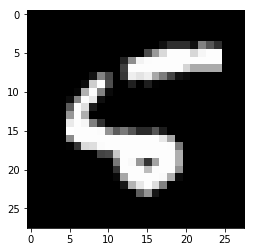

In [29]:
pp = X_test[8].reshape([28,28])
plt.gray()
plt.imshow(pp)

In [30]:
np.argmax(y_test[8])

5

In [31]:
sess.run(tf.argmax(a2,1)[8], feed_dict={x: X_test})

6